In [2]:
from keras.layers import Input,Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16   #VGG
from keras.applications.vgg16 import preprocess_input  #VGG
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator # Generates several instances of an images from different angles and directions
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
#VGG Neural networks is an innovative object-recognition model that supports upto 19 layers. Built as a deep CNN, VGG also outperforms baselines on many tasks and datasets outside of ImageNet. VGG is now still one of the most used image-recognition architectures.

In [3]:
IMAGE_SIZE = [224,224]

In [4]:
train_directory = '../input/100-bird-species/285 birds/train'
test_directory = '../input/100-bird-species/285 birds/test'
val_directory = '../input/100-bird-species/285 birds/valid'

In [5]:
#adding preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)
#it is already pre-trained so we do not have to train them again
for layer in vgg.layers:
    layer.trainable=False

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
#used to get number of classes/folders
folders = glob('../input/100-bird-species/285 birds/train/*')
len(folders)

285

In [7]:
#adding layers of vgg- (we can add as many layers as we want for more accuracy upto 19 layers)
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation = 'softmax')(x)

In [8]:
#create a model object
model = Model(inputs=vgg.input, outputs=prediction)

#view the structure of model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
#"model.compile()" is a METHOD which does configuration
#it sets the arguments you pass it : optimizer, loss function, metrics and eager execution
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
train_data = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip=True)
test_data = ImageDataGenerator(rescale = 1./255)

train_set = train_data.flow_from_directory(train_directory,
                                          target_size=(244,244),
                                          batch_size = 32,
                                          class_mode = 'categorical')
test_set = test_data.flow_from_directory(test_directory,
                                        target_size =(224,224),
                                        batch_size = 32,
                                        class_mode ='categorical')

Found 40930 images belonging to 285 classes.
Found 1425 images belonging to 285 classes.


In [11]:
import multiprocessing as threading
import multiprocessing as queue
#training the data
r = model.fit(
train_set,
validation_data = test_set,
epochs=5,
steps_per_epoch = len(train_set),
validation_steps=len(test_set)
)


Epoch 1/5
1280/1280 [==============================] - 800s 618ms/step - loss: 5.5360 - accuracy: 0.2632 - val_loss: 2.6255 - val_accuracy: 0.5874
Epoch 2/5
1280/1280 [==============================] - 575s 450ms/step - loss: 2.3572 - accuracy: 0.6358 - val_loss: 2.4624 - val_accuracy: 0.6709
Epoch 3/5
1280/1280 [==============================] - 565s 441ms/step - loss: 1.9491 - accuracy: 0.7070 - val_loss: 2.2592 - val_accuracy: 0.6933
Epoch 4/5
1280/1280 [==============================] - 567s 443ms/step - loss: 1.5684 - accuracy: 0.7607 - val_loss: 2.3078 - val_accuracy: 0.7193
Epoch 5/5
1280/1280 [==============================] - 569s 445ms/step - loss: 1.3954 - accuracy: 0.7925 - val_loss: 2.2589 - val_accuracy: 0.7432


NameError: name 'time' is not defined

In [19]:
model.save('BC.h5')

In [13]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model_1= load_model('./BC.h5',compile=False)

In [14]:
lab = train_set.class_indices
#swapping 
lab={k:v for v,k in lab.items()}

In [15]:
def output(location):
    img = load_img(location, target_size = (224,224,3)) # loading the image
    img = img_to_array(img) # converting img to array
    img = img/225
    img =np.expand_dims(img,[0])
    answer=model_1.predict(img) #gives to the model_1 to predict which returns a metrics or label
    y_class = answer.argmax(axis=-1) #return list ex.[50]
    y=" ".join(str(x) for x in y_class ) #converts list to string ex. 50
    y = int(y) # converts str into int
    res = lab[y]
    return res
    
    

'BEARDED BARBET'

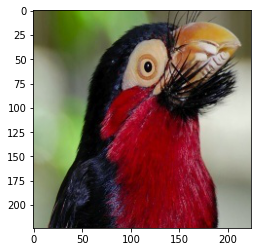

In [18]:
img = '../input/100-bird-species/285 birds/test/BEARDED BARBET/2.jpg'
pic = load_img('../input/100-bird-species/285 birds/test/BEARDED BARBET/2.jpg', target_size=(224,224,3))
plt.imshow(pic)
output(img)